In [17]:
import numpy as np
import pandas as pd
import os 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df=pd.read_csv("/kaggle/input/shopping-mall-customer-data-segmentation-analysis/Shopping Mall Customer Segmentation Data .csv")

In [19]:
df

,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76
...,...,...,...,...,...
15074,a0504768-a85f-4930-ac24-55bc8e4fec9e,29,Female,97723,30
15075,a08c4e0e-d1fe-48e7-9366-aab11ae409cd,22,Male,73361,74
15076,0e87c25a-268c-401a-8ba1-7111dcde6f1a,18,Female,112337,48
15077,5f388cbe-3373-4e16-b743-38f508f2249f,26,Female,94312,5


In [20]:
label=LabelEncoder()
df["Gender"]=label.fit_transform(df["Gender"])

In [21]:
df

,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,1,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,0,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,0,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,1,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,1,153752,76
...,...,...,...,...,...
15074,a0504768-a85f-4930-ac24-55bc8e4fec9e,29,0,97723,30
15075,a08c4e0e-d1fe-48e7-9366-aab11ae409cd,22,1,73361,74
15076,0e87c25a-268c-401a-8ba1-7111dcde6f1a,18,0,112337,48
15077,5f388cbe-3373-4e16-b743-38f508f2249f,26,0,94312,5


In [22]:
new_df=df.drop(columns=["Customer ID"])
X=df.drop(columns=["Customer ID","Spending Score"])
Y=df[["Spending Score"]]

In [23]:
Y

,Spending Score
0,89
1,95
2,76
3,57
4,76
...,...
15074,30
15075,74
15076,48
15077,5


In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [25]:
random_reg=RandomForestRegressor(n_estimators=50)
random_reg.fit(X_train,Y_train)
random_reg.score(X_test,Y_test)

/tmp/ipykernel_33/3079594239.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



-0.1919483639488968

In [26]:
cx=new_df.corr()
cx

,Age,Gender,Annual Income,Spending Score
Age,1.000000,0.002034,0.004776,-0.008251
Gender,0.002034,1.000000,-0.003038,0.006703
Annual Income,0.004776,-0.003038,1.000000,0.003234
Spending Score,-0.008251,0.006703,0.003234,1.000000


<Axes: >

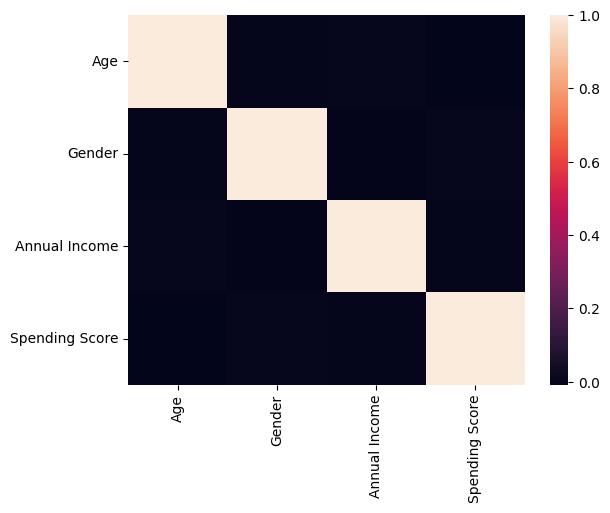

In [27]:
sns.heatmap(cx)


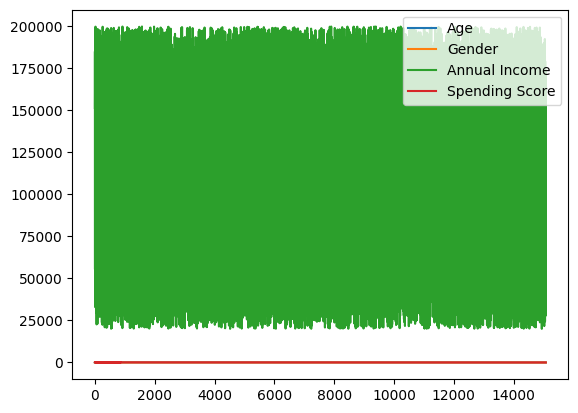

In [28]:
new_df.plot()
plt.show()

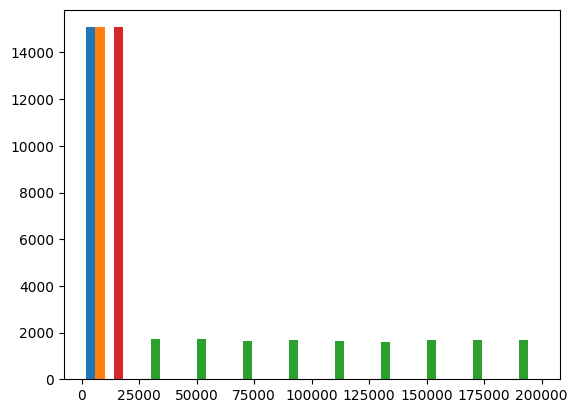

In [29]:
plt.hist(new_df)
plt.show()

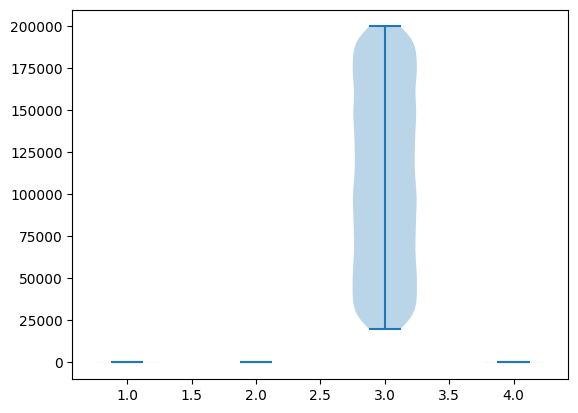

In [30]:
plt.violinplot(new_df)
plt.show()

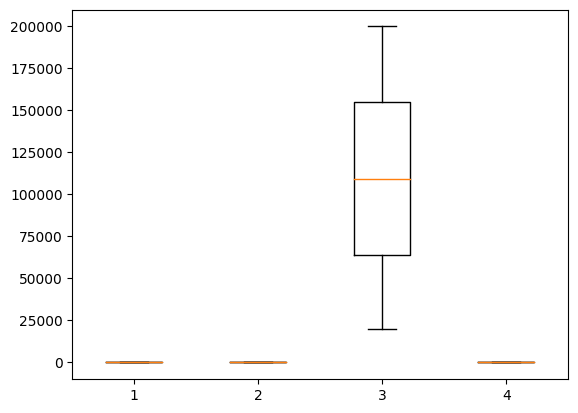

In [31]:
plt.boxplot(new_df)
plt.show()

In [32]:
import plotly.express as px
fig = px.scatter(new_df, x='Age', y='Annual Income', color='Spending Score', title='Age vs Annual Income')
fig.show()


In [33]:
fig2=px.line(new_df)
fig2.show()

In [34]:
fig3=px.histogram(new_df,x='Gender', y='Annual Income')
fig3.show()

In [35]:
fig4=px.bar(new_df,x='Gender', y='Annual Income')
fig4.show()

In [36]:
fig5 = px.scatter_3d(new_df, x='Age', y='Annual Income', z='Spending Score', color='Gender', 
                    title='3D Scatter Plot of Age, Annual Income, and Spending Score')

fig5.show()

In [37]:
fig = px.scatter_3d(new_df, x='Gender', y='Age', z='Spending Score', color='Gender', 
                    title='3D Scatter Plot of Age, Gender, and Spending Score')

# Show the plot
fig.show()

In [ ]:
import plotly.graph_objects as go
import numpy as np
x = new_df['Age']
y = new_df['Annual Income']
z = new_df['Spending Score']

fig = go.Figure(data=[go.Histogram2dcontour(x=x, y=y, z=z, colorscale='Viridis')])

fig.update_layout(title='3D Heatmap', 
                  scene=dict(xaxis_title='Age', 
                             yaxis_title='Annual Income', 
                             zaxis_title='Spending Score'))

fig.show()


In [39]:
import plotly.graph_objects as go

x = new_df['Age']
y = new_df['Annual Income']
z = new_df['Spending Score']

fig = go.Figure(data=[go.Histogram2dContour(x=x, y=y, z=z, colorscale='Viridis')])

fig.update_layout(title='2D Histogram Contour Plot',
                  xaxis_title='Age',
                  yaxis_title='Annual Income')

# Show plot
fig.show()
